# Week 2 Lessons
## Working with Data: Python and the Pandas Library

### Pandas Series

Length of index is 91


<Axes: >

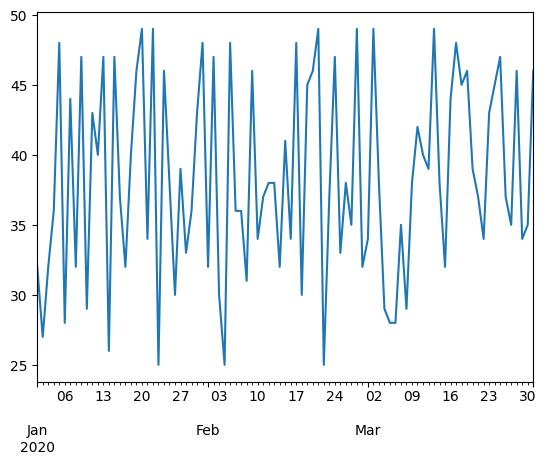

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

start_date = "Jan 1, 2020"
end_date = "Mar 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot()

<Axes: >

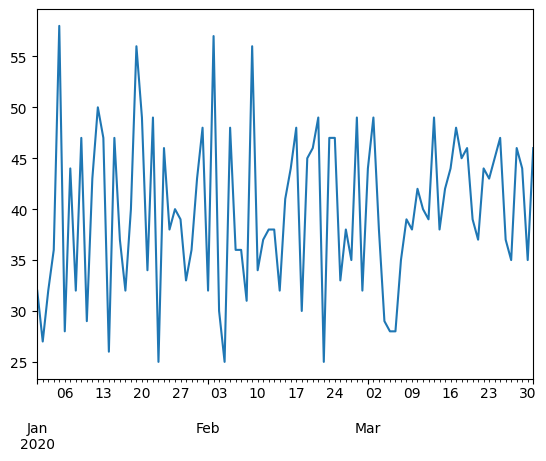

In [4]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))

total_items = items_sold.add(additional_items,fill_value=0)
total_items.plot()

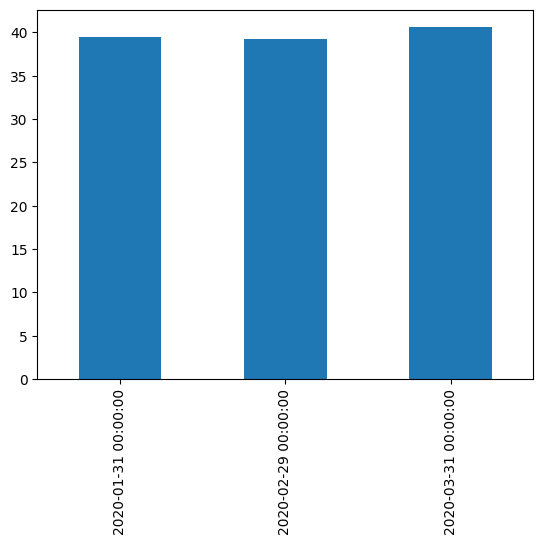

In [5]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar')

## DataFrame
A DataFrame is essentially a collection of series with the same index. We can combine several series together into a DataFrame:

In [7]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","play","games","and","will","not","change"],index=range(0,9))
df = pd.DataFrame([a,b])
df

,0,1,2,3,4,5,6,7,8
0,1,2,3,4,5,6,7,8,9
1,I,like,to,play,games,and,will,not,change


In [8]:
# We can also use Series as columns, and specify column names using dictionary:

df = pd.DataFrame({ 'A' : a, 'B' : b })
df

,A,B
0,1,I
1,2,like
2,3,to
3,4,play
4,5,games
5,6,and
6,7,will
7,8,not
8,9,change


In [10]:
# Note that we can also get this table layout by transposing the previous table, eg. by writing

df = pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })
df

,A,B
0,1,I
1,2,like
2,3,to
3,4,play
4,5,games
5,6,and
6,7,will
7,8,not
8,9,change


## Here are a few most important operations we can perform on DataFrames:

#### Column Selection

Column selection. We can select individual columns by writing df['A'] - this operation returns a Series. We can also select a subset of columns into another DataFrame by writing df[['B','A']] - this return another DataFrame.

In [11]:
df['A']

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: object

We can also select a subset of columns into another DataFrame by writing df[['B','A']] - this return another DataFrame.

In [14]:
df[['B','A']]
df

,A,B
0,1,I
1,2,like
2,3,to
3,4,play
4,5,games
5,6,and
6,7,will
7,8,not
8,9,change


#### Filtering

Filtering only certain rows by criteria. For example, to leave only rows with column A greater than 5, we can write df[df['A']>5].

In [15]:
df[df['A']>5]

,A,B
5,6,and
6,7,will
7,8,not
8,9,change


Note: The way filtering works is the following. The expression df['A']<5 returns a boolean series, which indicates whether expression is True or False for each element of the original series df['A']. When boolean series is used as an index, it returns subset of rows in the DataFrame. Thus it is not possible to use arbitrary Python boolean expression, for example, writing df[df['A']>5 and df['A']<7] would be wrong. Instead, you should use special & operation on boolean series, writing df[(df['A']>5) & (df['A']<7)] (brackets are important here

In [16]:
df['A']<5

0     True
1     True
2     True
3     True
4    False
5    False
6    False
7    False
8    False
Name: A, dtype: bool

In [20]:
(df[(df['A']>5) & (df['A']<7)])

,A,B
5,6,and


#### Creating new computable columns.

 Creating new computable columns. We can easily create new computable columns for our DataFrame by using intuitive expression like this:

In [22]:
df['DivA'] = df['A']-df['A'].mean() 
df

,A,B,DivA
0,1,I,-4.0
1,2,like,-3.0
2,3,to,-2.0
3,4,play,-1.0
4,5,games,0.0
5,6,and,1.0
6,7,will,2.0
7,8,not,3.0
8,9,change,4.0


This example calculates divergence of A from its mean value. What actually happens here is we are computing a series, and then assigning this series to the left-hand-side, creating another column.

Thus, we cannot use any operations that are not compatible with series, for example, the code below is wrong:

In [ ]:
# Wrong code -> df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # <- Wrong result

The latter example, while being syntactically correct, gives us wrong result, because it assigns the length of series B to all values in the column, and not the length of individual elements as we intended.

If we need to compute complex expressions like this, we can use apply function. The last example can be written as follows:

In [24]:
df['LenB'] = df['B'].apply(lambda x : len(x))
# or 
df['LenB'] = df['B'].apply(len)
df

,A,B,DivA,LenB
0,1,I,-4.0,1
1,2,like,-3.0,4
2,3,to,-2.0,2
3,4,play,-1.0,4
4,5,games,0.0,5
5,6,and,1.0,3
6,7,will,2.0,4
7,8,not,3.0,3
8,9,change,4.0,6


#### Selecting rows based on numbers 

can be done using iloc construct. For example, to select first 5 rows from the DataFrame:

In [26]:
df.iloc[:5]

,A,B,DivA,LenB
0,1,I,-4.0,1
1,2,like,-3.0,4
2,3,to,-2.0,2
3,4,play,-1.0,4
4,5,games,0.0,5


#### Grouping
is often used to get a result similar to pivot tables in Excel. Suppose that we want to compute mean value of column A for each given number of LenB. Then we can group our DataFrame by LenB, and call mean:

In [27]:
df.groupby(by='LenB').mean()

C:\Users\This Pc\AppData\Local\Temp\ipykernel_1240\3124244086.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='LenB').mean()


,A,DivA
LenB,,
1,1.000000,-4.000000
2,3.000000,-2.000000
3,7.000000,2.000000
4,4.333333,-0.666667
5,5.000000,0.000000
6,9.000000,4.000000


#### If we need to compute mean and the number of elements in the group, then we can use more complex aggregate function:

In [28]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

,Count,Mean
LenB,,
1,1,1.000000
2,1,3.000000
3,2,7.000000
4,3,4.333333
5,1,5.000000
6,1,9.000000


## Getting Data
We have seen how easy it is to construct Series and DataFrames from Python objects. However, data usually comes in the form of a text file, or an Excel table. Luckily, Pandas offers us a simple way to load data from disk. For example, reading CSV file is as simple as this:

In [ ]:
df = pd.read_csv('file.csv')